In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
#Configurations
agents = {"UCT": "UCT", "AnySH": "Anytime Sequential Halving"}

games = ["Yavalath", "Breakthrough", "Amazons", "Clobber"]
budgets = [1000, 20000, 50000]
agent_names = ["RegressionTreeSHUCTAny", "DoubleIterRegressionTreeSHUCTAny"]
data = []

directory = ["D:\Anytime-Sequential-Halving\Regression Tree Experiments\Standard Reg", "D:\Anytime-Sequential-Halving\Regression Tree Experiments\DoubleIter Reg"]

#Loop through directories, agents, games, and budgets to get data
for dir in directory:
    for agentFolder, agent in agents.items():
        for game in games:
            for budget in budgets:
                path = f"{dir}/{agentFolder}/{game}/budget_{budget}/raw_results.csv"

                df = pd.read_csv(path)

                wins = losses = draws = total = 0

                for row in df.itertuples(index=False):
                    agentColoumn = row.agents.strip("()")
                    agentColoumn = agentColoumn.replace("'", "")
                    agentColoumn = agentColoumn.split(" / ")
                    scoreColoumn = list(map(float, row.utilities.split(";")))

                    for index, agentName in enumerate(agentColoumn):
                        if dir == directory[0]:
                            if agent_names[0] in agentName:
                                score = scoreColoumn[index]
                                break
                        else:
                            if agent_names[1] in agentName:
                                score = scoreColoumn[index]
                                break
                    else:
                        print("Agent not found in row")
                        continue

                    if score == 1.0:
                        wins += 1
                    elif score == -1.0:
                        losses += 1
                    else:
                        draws += 1

                    total += 1

                data.append({
                    "directory": dir,
                    "folder": agentFolder,
                    "opponent": agent,
                    "game": game,
                    "budget": budget,
                    "wins": wins,
                    "draws": draws,
                    "losses": losses,
                    "win_Percentage": wins / total,
                    "loss_Percentage": losses / total,
                    "draw_Percentage": draws / total
                })


df = pd.DataFrame(data)
df = df.sort_values(by=["game", "budget"])
df = df.reset_index(drop=True)
df.head()


,directory,folder,opponent,game,budget,wins,draws,losses,win_Percentage,loss_Percentage,draw_Percentage
0,D:\Anytime-Sequential-Halving\Regression Tree ...,UCT,UCT,Amazons,1000,46,0,54,0.46,0.54,0.0
1,D:\Anytime-Sequential-Halving\Regression Tree ...,AnySH,Anytime Sequential Halving,Amazons,1000,58,0,42,0.58,0.42,0.0
2,D:\Anytime-Sequential-Halving\Regression Tree ...,UCT,UCT,Amazons,1000,42,0,58,0.42,0.58,0.0
3,D:\Anytime-Sequential-Halving\Regression Tree ...,AnySH,Anytime Sequential Halving,Amazons,1000,46,0,54,0.46,0.54,0.0
4,D:\Anytime-Sequential-Halving\Regression Tree ...,UCT,UCT,Amazons,20000,53,0,47,0.53,0.47,0.0


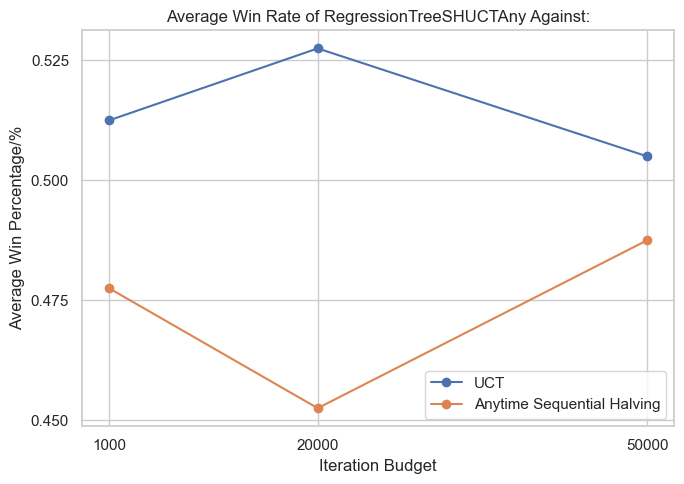

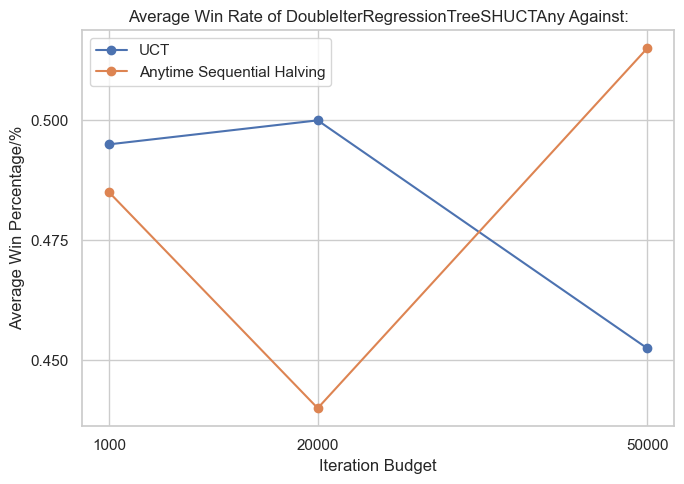

In [ ]:
sns.set_theme(style="whitegrid")
##Create 2 plots since we have 2 agents

#Loop through each agent
for agent in df["directory"].unique():
        if agent == directory[0]:
            agent_name = agent_names[0]
        else:
            agent_name = agent_names[1]
        
        #Plot parameters
        plt.figure(figsize=(7, 5))
        plt.title(f"Average Win Rate of {agent_name} Against:")
        plt.xlabel("Iteration Budget")
        plt.ylabel("Average Win Percentage/%")
        plt.yticks(np.linspace(0, 1, 41))
        plt.xticks(budgets)
    
        #Loop through the opponent agents
        for opponent in df["opponent"].unique():
            #Created filtered df to only get rows with the current directory and enemy agent
            filtered_rows = df[(df["directory"] == agent) & (df["opponent"] == opponent)]
        
            #Group by budget and calculate average win rate for that budget across all the games
            averageDF= filtered_rows.groupby("budget")["win_Percentage"].mean().reset_index()

            #Plot average win percentage for each budget value
            plt.plot(averageDF["budget"], averageDF["win_Percentage"], marker='o', label=opponent)
            #plt.plot(averageDF["budget"], averageDF["win_Percentage"], marker='o', label=opponent, linestyle='None')

        plt.legend()
        plt.tight_layout()
        plt.show()

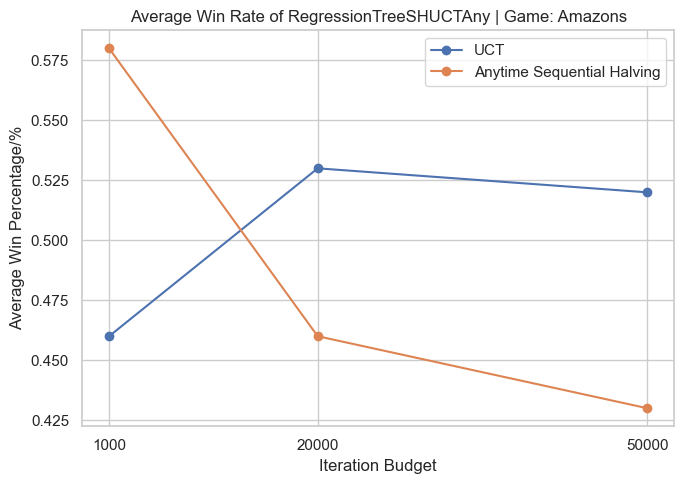

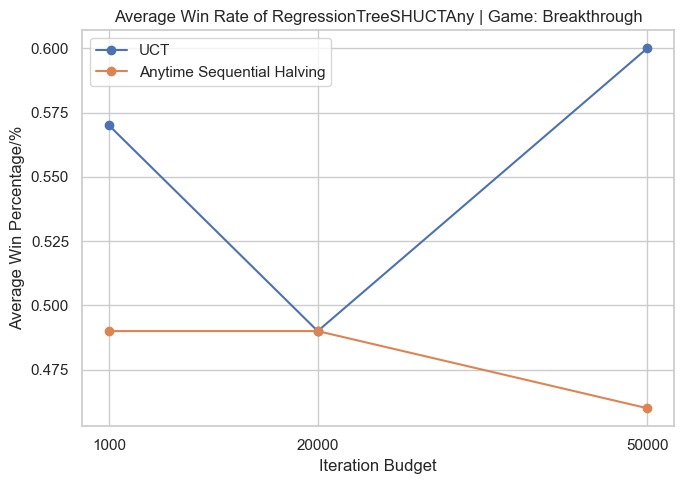

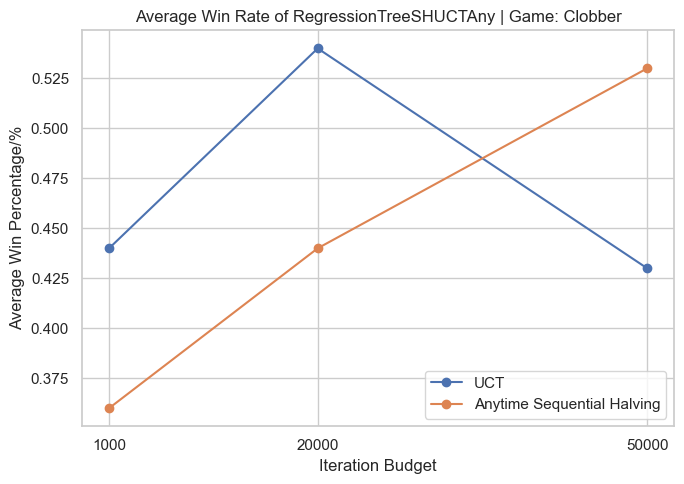

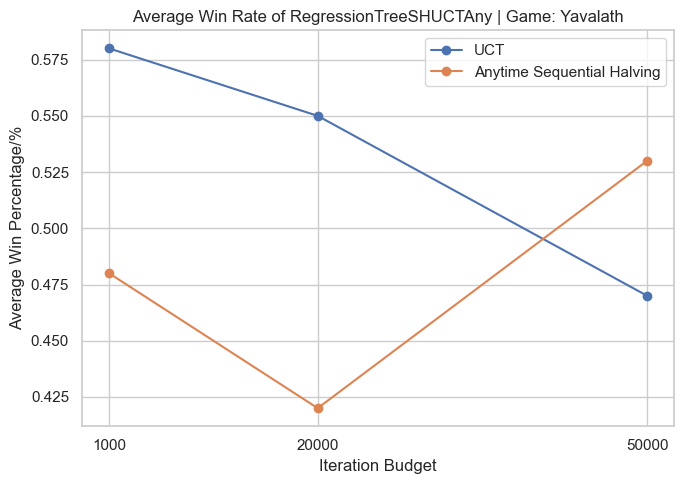

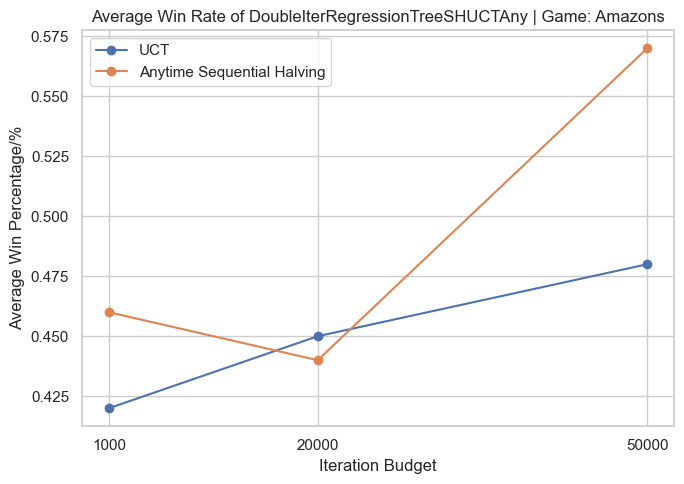

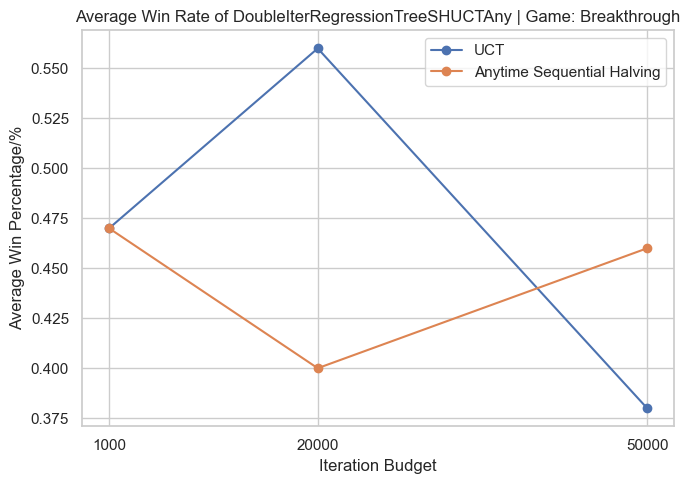

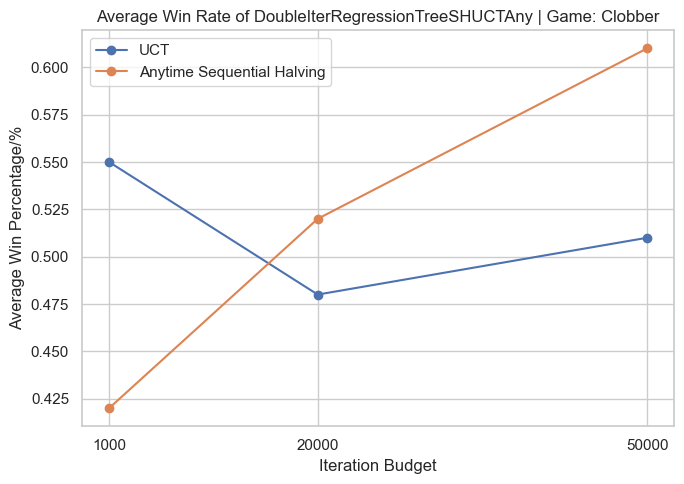

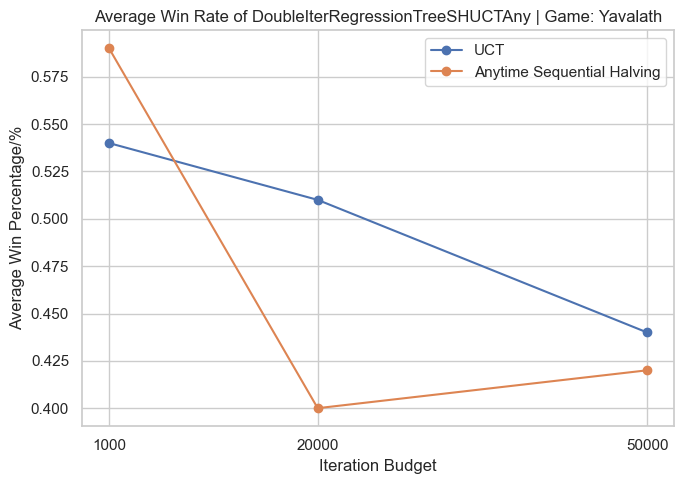

In [23]:
sns.set_theme(style="whitegrid")
#Create 8 plots since we have 4 games and 2 agents

#Loop through each agent
for agent in df["directory"].unique():
        if agent == directory[0]:
            agent_name = agent_names[0]
        else:
            agent_name = agent_names[1]
        
        #Loop through each game
        for game in df["game"].unique():
            #Plot parameters
            plt.figure(figsize=(7, 5))
            plt.title(f"Average Win Rate of {agent_name} | Game: {game}")
            plt.xlabel("Iteration Budget")
            plt.ylabel("Average Win Percentage/%")
            plt.yticks(np.linspace(0, 1, 41))
            plt.xticks(budgets)
    
            #Loop through the opponent agents
            for opponent in df["opponent"].unique():
                #Created filtered df to only get rows with the current directory and enemy agent and the current game
                filtered_rows = df[(df["directory"] == agent) & (df["opponent"] == opponent) & (df["game"] == game)]
        
                #Group by budget and calculate average win rate for that budget across each game
                averageDF= filtered_rows.groupby("budget")["win_Percentage"].mean().reset_index()

                #Plot average win percentage for each budget value
                plt.plot(averageDF["budget"], averageDF["win_Percentage"], marker='o', label=opponent)
                #plt.plot(averageDF["budget"], averageDF["win_Percentage"], marker='o', label=opponent, linestyle='None')

            plt.legend()
            plt.tight_layout()
            plt.show()